In [ ]:
import os
from PIL import Image
import subprocess

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# drive.mount('/content')

Mounted at /content/drive


In [ ]:
!cp '/content/drive/MyDrive/checkpoint.pth.tar' -d '/content/'

cp: cannot stat '/content/drive/MyDrive/checkpoint.pth.tar': No such file or directory


In [ ]:
!unzip '/content/drive/MyDrive/DAiSEE.zip' -d '/content/drive/MyDrive/DAiSEE'

Streaming output truncated to the last 5000 lines.
   creating: /content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/Validation/799402/79940202160/
  inflating: /content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/Validation/799402/79940202160/79940202160.mp4  
   creating: /content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/Validation/799402/7994020160/
  inflating: /content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/Validation/799402/7994020160/7994020160.mp4  
   creating: /content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/Validation/799402/79940202320/
  inflating: /content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/Validation/799402/79940202320/79940202320.mp4  
   creating: /content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/Validation/799402/7994020230/
  inflating: /content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/Validation/799402/7994020230/7994020230.mp4  
   creating: /content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/Validation/799402/79940201410/
  inflating: /content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/Validation/799402/7994020141

In [ ]:
# Split a video and save each frame
def split_video(video_file, image_name_prefix, destination_path):
    return subprocess.check_output('ffmpeg -i "' + destination_path+video_file + '" ' + image_name_prefix + '%d.jpg -hide_banner', shell=True, cwd=destination_path)

In [ ]:
# !pip install 'difPy'

  Created wheel for difPy: filename=difPy-2.2-py3-none-any.whl size=6418 sha256=d6666a88bcfc2548f1423b61b6a9aeaa01609206922f363c795ccd5c61ac8f44
  Stored in directory: /root/.cache/pip/wheels/8f/b0/96/02e135e174ac3bc263bbb16eea68b66489b7c869382bbb1d22
Successfully built difPy


In [ ]:
import skimage.measure
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import imghdr
# from difPy import dif

In [ ]:
# Function that searches the folder for image files, converts them to a tensor
def create_imgs_matrix(directory, px_size=50):
    global image_files   
    image_files = []
    # create list of all files in directory     
    folder_files = [filename for filename in os.listdir(directory)]  
    
    # create images matrix   
    counter = 0
    for filename in folder_files: 
        # check if the file is accesible and if the file format is an image
        if not os.path.isdir(directory + filename) and imghdr.what(directory + filename):
            # decode the image and create the matrix
            img = cv2.imdecode(np.fromfile(directory + filename, dtype=np.uint8), cv2.IMREAD_UNCHANGED)
            if type(img) == np.ndarray:
                img = img[...,0:3]
                # resize the image based on the given compression value
                img = cv2.resize(img, dsize=(px_size, px_size), interpolation=cv2.INTER_CUBIC)
                if counter == 0:
                    imgs_matrix = img
                    image_files.append(filename)
                    counter += 1
                else:
                    imgs_matrix = np.concatenate((imgs_matrix, img))
                    image_files.append(filename)
    return imgs_matrix

In [ ]:
search = dif("/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/Test/826412/826412010", similarity="normal")
search.result

In [ ]:
from imagededup.methods import DHash
method_object = DHash()

for ttv in ['Test', 'Train', 'Validation']:
    if ttv == '.DS_Store':
        continue
    users = os.listdir('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/')
    for user in users:
        if user == '.DS_Store':
            continue
        currUser = os.listdir('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/'+user+'/')
        for extract in currUser:
            if extract == '.DS_Store':
                continue
            currExtract = os.listdir('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/'+user+'/'+extract+'/')
            for frame in currExtract:
              if extract == '.DS_Store':
                continue
            image = Image.open('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/'+user+'/'+extract+'/'+frame+'')
            method_object.find_duplicates_to_remove(image_dir='/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/'+user+'/'+extract+'/', min_similarity_threshold=0.85) 

Found 270 images with one or more duplicate/similar images in 13.2149 seconds.


{'8264120101.jpg': {'duplicates': ['/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/Test/826412/826412010/8264120102.jpg'],
  'location': '/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/Test/826412/826412010/8264120101.jpg'},
 '82641201010.jpg': {'duplicates': ['/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/Test/826412/826412010/82641201011.jpg'],
  'location': '/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/Test/826412/826412010/82641201010.jpg'},
 '826412010100.jpg': {'duplicates': ['/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/Test/826412/826412010/826412010101.jpg',
   '/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/Test/826412/826412010/826412010102.jpg',
   '/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/Test/826412/826412010/826412010103.jpg'],
  'location': '/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/Test/826412/826412010/826412010100.jpg'},
 '826412010101.jpg': {'duplicates': ['/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/Test/826412/826412010/826412010102.jpg',
   '/content/drive/MyDri

In [ ]:
def _search_blurry(directory, px_size, threshold, show_output):
    img_matrices, filenames = Image_Blur_Filterer._create_imgs_matrix(directory, px_size)
    blurry_images = []
    unblurred_images=[]
    result = {}
    # find duplicates/similar images within one folder
    for count_A, imageMatrix_A in enumerate (img_matrices): 
        gray = cv2.cvtColor(imageMatrix_A, Cv2.COLOR_BGR2GRAY)
        fm = cv2.Laplacian (gray, cv2.CV_64F).var()
        # if the focus measure is less than the supplied threshold, # then the image should be considered "blurry"
        if fm< threshold:
            result[filenames [ count_A]] = filenames [count_A]
            blurry_images.append(directory+ "/" + filenames [ count_A])
            # show the image
            Image_Blur_Filterer._show_img_figs (gray, filenames [count_A], fm)
        else:
            unblurred_images.append(directory+ "/" + filenames [ count_A])
    if show_output:
        print (blurry_images) 
    return result, blurry_images, unblurred_images

Sample of blurred image:



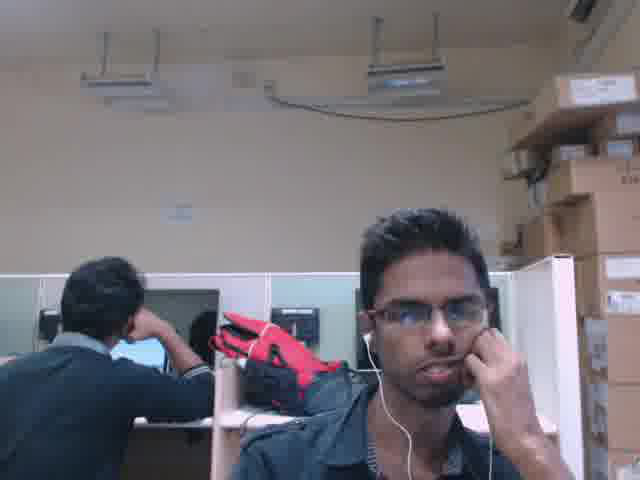

Sample of unblurred image:



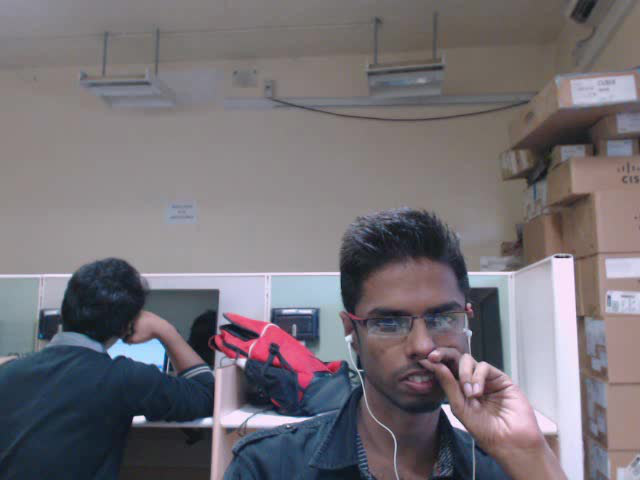

In [ ]:
for ttv in ['Test', 'Train', 'Validation']:
    if ttv == '.DS_Store':
        continue
    users = os.listdir('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/')
    for user in users:
        if user == '.DS_Store':
            continue
        currUser = os.listdir('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/'+user+'/')
        for extract in currUser:
            if extract == '.DS_Store':
                continue
            currExtract = os.listdir('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/'+user+'/'+extract+'/')
            for frame in currExtract:
              if extract == '.DS_Store':
                continue
            image = Image.open('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/'+user+'/'+extract+'/'+frame+'')
            method_object.find_duplicates_to_remove(image_dir='/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/'+user+'/'+extract+'/', min_similarity_threshold=0.85) 
            result, blurry_images, unblurred_images =_search_blurry('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/'+user+'/'+extract+'/', 520, 0.8, False)

print('Sample of blurred image:\n')
display.display(blurry_images[0])

print('Sample of unblurred image:\n') 
display.display(unblurred_images[0])

In [ ]:
# Code for getting frame from each video
for ttv in ['Train', 'Test', 'Validation']:
    print('ttv is', ttv)
    if ttv == '.DS_Store':
        continue
    users = os.listdir('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/')
    for user in users:
        print('user is', user)
        if user == '.DS_Store':
            continue
        currUser = os.listdir('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/'+user+'/')
        for extract in currUser:
            print('extract is', extract)
            if extract == '.DS_Store':
                continue
            clip = os.listdir('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/'+user+'/'+extract+'/')[0]
            if clip == '.DS_Store':
                clip = os.listdir('DAiSEE/DAiSEE/DataSet/'+ttv+'/'+user+'/'+extract+'/')[1]
            print (clip[:-4])
            path = os.path.abspath('.')+'/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/'+user+'/'+extract+'/'
            split_video(clip, clip[:-4], path)
            # break

ttv is Train
user is 110013
extract is 1100131011
1100131011
extract is 1100131009
1100131009
extract is 1100131006
1100131006
extract is 1100131010
1100131010
extract is 1100131007
1100131007
extract is 1100131017
1100131017
extract is 1100131019
1100131019
extract is 1100131012
1100131012
user is 310070
extract is 3100701021
3100701021
extract is 3100701024
3100701024
extract is 3100702051
3100702051
extract is 3100701031
3100701031
extract is 3100701023
3100701023
extract is 3100702004
3100702004
extract is 3100702059
3100702059
extract is 3100701012
3100701012
extract is 3100702025
3100702025
extract is 3100701014
3100701014
extract is 3100701032
3100701032
extract is 3100701011
3100701011
extract is 3100702013
3100702013
extract is 3100701044
3100701044
extract is 3100702046
3100702046
extract is 3100701005
3100701005
extract is 3100701072
3100701072
extract is 3100701008
3100701008
extract is 3100702063
3100702063
extract is 3100702022
3100702022
extract is 3100702016
3100702016


KeyboardInterrupt: ignored

In [ ]:
import PIL
import shutil
import os
import torch
import torchvision
import numpy as np
from matplotlib.pyplot import imread
from PIL import Image

In [ ]:
k=0
frm_cnt=0
for ttv in ['Test', 'Train', 'Validation']:
    # print('ttv is', ttv)
    j=0
    cnt=0
    frm_cnt_local=0
    if ttv == '.DS_Store':
        continue
    users = os.listdir('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/')
    for user in users:
        # print('user is', user)
        l=0
        if user == '.DS_Store':
            continue
        currUser = os.listdir('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/'+user+'/')
        i=0
        for extract in currUser:
            if extract == '.DS_Store':
                continue
            cnt+=1
            k+=1
            currExtract = os.listdir('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/'+user+'/'+extract+'/')
            for frame in currExtract:
              if extract == '.DS_Store':
                continue
              frm_cnt+=1
              frm_cnt_local+1=0
              k+=1
              image = Image.open('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/'+user+'/'+extract+'/'+frame+'')
        j+=1
        cnt+=1
    print(f'{ttv} dataset:\n Total number of Users: {j}\n Total number of videos: {cnt}\n Total number of image frames: {frm_cnt_local}\n')
    
print(f'Overall - Total number of videos: {k}\nOverall - Total number of image frames: {frm_cnt}')
            # break

Test dataset:
 Total number of Users: 21
 Total number of videos: 1887
 Total number of image frames: 37740

Train dataset:
 Total number of Users: 70
 Total number of videos: 5552
 Total number of image frames: 111040

Validation dataset:
 Total number of Users: 22
 Total number of videos: 1742
 Total number of image frames: 34840

Overall - Total number of videos: 9068
Overall - Total number of image frames: 181360


In [ ]:
k=0
for ttv in ['Test', 'Train', 'Validation']:
    # print('ttv is', ttv)
    j=0
    cnt=0
    if ttv == '.DS_Store':
        continue
    users = os.listdir('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/')
    for user in users:
        # print('user is', user)
        l=0
        if user == '.DS_Store':
            continue
        currUser = os.listdir('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/'+user+'/')
        i=0
        for extract in currUser:
            if extract == '.DS_Store':
                continue
            cnt+=1
            k+=1
            currExtract = os.listdir('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/'+user+'/'+extract+'/')
        j+=1
        cnt+=1
    print(f'{ttv} dataset:\n Total number of Users: {j}\n Total number of videos: {cnt}\n Total number of image frames: {cnt*300}\n')
    


In [ ]:
test_ratio=0.8
allFileNames = os.listdir('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/Train')
np.random.shuffle(allFileNames)
train_FileNames, test_FileNames = np.split(np.array(allFileNames),[int(len(allFileNames)* (1 - test_ratio))])

In [ ]:
k=0
frm_cnt=0
for ttv in ['Test', 'Train', 'Validation']:
    # print('ttv is', ttv)
    j=0
    cnt=0
    frm_cnt_local=0
    if ttv == '.DS_Store':
        continue
    users = os.listdir('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/')
    for user in users:
        # print('user is', user)
        l=0
        if user == '.DS_Store':
            continue
        currUser = os.listdir('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/'+user+'/')
        i=0
        for extract in currUser:
            if extract == '.DS_Store':
                continue
            cnt+=1
            k+=1
            currExtract = os.listdir('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/'+user+'/'+extract+'/')
            for frame in currExtract:
              if extract == '.DS_Store':
                continue
              frm_cnt+=1
              frm_cnt_local+1=0
              k+=1
              image = Image.open('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/'+user+'/'+extract+'/'+frame+'')
        j+=1
        cnt+=1
    print(f'{ttv} dataset:\n Total number of Users: {j}\n Total number of videos: {cnt}\n Total number of image frames: {frm_cnt_local}\n')
    
print(f'Overall - Total number of videos: {k}\nOverall - Total number of image frames: {frm_cnt}')
            # break

Test dataset:
 Total number of Users: 21
 Total number of videos: 1887
 Total number of image frames: 566100

Train dataset:
 Total number of Users: 70
 Total number of videos: 5552
 Total number of image frames: 1665600

Validation dataset:
 Total number of Users: 22
 Total number of videos: 1742
 Total number of image frames: 522600

Overall - Total number of videos: 9068
Overall - Total number of image frames: 2720400


In [ ]:
image = Image.open('/content/drive/MyDrive/DAiSEE Dataset/DAiSEE Dataset/DAiSEE/DataSet/Train/310071/310070104.jpeg')
brightness_1=calculate_brightness(image)
print('Brightness of 310070104 is: %s' % (brightness_1))
image = Image.open('/content/drive/MyDrive/DAiSEE Dataset/DAiSEE Dataset/DAiSEE/DataSet/Train/310071/310070105.jpeg')
brightness_1=calculate_brightness(image)
print('Brightness of 310070105 is: %s' % (brightness_1))
image = Image.open('/content/drive/MyDrive/DAiSEE Dataset/DAiSEE Dataset/DAiSEE/DataSet/Train/310071/310070106.jpeg')
brightness_1=calculate_brightness(image)
print('Brightness of 310070106 is: %s' % (brightness_1))
image = Image.open('/content/drive/MyDrive/DAiSEE Dataset/DAiSEE Dataset/DAiSEE/DataSet/Train/310071/310070107.jpeg')
brightness_1=calculate_brightness(image)
print('Brightness of 310070107 is: %s' % (brightness_1))
image = Image.open('/content/drive/MyDrive/DAiSEE Dataset/DAiSEE Dataset/DAiSEE/DataSet/Train/310071/3100710101.jpeg')
brightness_1=calculate_brightness(image)
print('Brightness of 3100710101 is: %s' % (brightness_1))
image = Image.open('/content/drive/MyDrive/DAiSEE Dataset/DAiSEE Dataset/DAiSEE/DataSet/Train/310071/3100710102.jpeg')
brightness_1=calculate_brightness(image)
print('Brightness of 3100710102 is: %s' % (brightness_1))
image = Image.open('/content/drive/MyDrive/DAiSEE Dataset/DAiSEE Dataset/DAiSEE/DataSet/Train/310071/3100710103.jpeg')
brightness_1=calculate_brightness(image)
print('Brightness of 3100710103 is: %s' % (brightness_1))
image = Image.open('/content/drive/MyDrive/DAiSEE Dataset/DAiSEE Dataset/DAiSEE/DataSet/Train/310071/3100710108.jpeg')
brightness_1=calculate_brightness(image)
print('Brightness of 3100710108 is: %s' % (brightness_1))

Brightness of 310070104 is: 0.6819975953407574
Brightness of 310070105 is: 0.673187361478029
Brightness of 310070106 is: 0.6819975953407574
Brightness of 310070107 is: 0.6819975953407574
Brightness of 3100710101 is: 0.42639817062858415
Brightness of 3100710102 is: 0.42639817062858415
Brightness of 3100710103 is: 0.6496167550516697
Brightness of 3100710108 is: 0.42639817062858415


In [ ]:
import sys
from PIL import Image
def calculate_brightness(image):
    greyscale_image = image.convert('L')
    histogram = greyscale_image.histogram()
    pixels = sum(histogram)
    brightness = scale = len(histogram)
    for index in range(0, scale):
        ratio = histogram[index] / pixels
        brightness += ratio * (-scale + index)
    return 1 if brightness == 255 else brightness / scale
i=0
brightness= [0 for i in range(300)]

for ttv in ['Test', 'Train', 'Validation']:
    # print('ttv is', ttv)
    j=0
    cnt=0
    if ttv == '.DS_Store':
        currUser = os.listdir('/content/drive/MyDrive/DAiSEE Dataset/DAiSEE Dataset/DAiSEE/DataSet/Train/')
        continue
    users = os.listdir('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/')
    for user in users:
        # print('user is', user)
        l=0
        if user == '.DS_Store':
            continue
        currUser = os.listdir('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/'+user+'/')
        i=0
        for extract in currUser:
            if extract == '.DS_Store':
                continue
            cnt+=1
            k+=1
            currExtract = os.listdir('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/'+user+'/'+extract+'/')
        j+=1
        cnt+=1
for extract in currUser:
  if extract == '1100141050.avi':
    continue
  image = Image.open('/content/drive/MyDrive/DAiSEE Dataset/DAiSEE Dataset/DAiSEE/DataSet/Train/110014/1100141050/'+extract+'')
  brightness[i]=calculate_brightness(image)
  print('Brightness of %s is: %s' % (extract, brightness[i]))
  i+=1
max_value_1 = max(brightness)
min_value_1 = min(brightness)
avg_value_1 = 0 if len(brightness) == 0 else sum(brightness)/len(brightness)
currUser = os.listdir('/content/drive/MyDrive/DAiSEE Dataset/DAiSEE Dataset/DAiSEE/DataSet/Train/310062/3100621059/')
for extract in currUser:
  if extract == '3100621059.avi':
    continue
  image = Image.open('/content/drive/MyDrive/DAiSEE Dataset/DAiSEE Dataset/DAiSEE/DataSet/Train/310062/3100621059/'+extract+'')
  brightness[i]=calculate_brightness(image)
  print('Brightness of %s is: %s' % (extract, brightness[i]))
  i+=1
max_value_2 = max(brightness)
min_value_2 = min(brightness)
avg_value_2 = 0 if len(brightness) == 0 else sum(brightness)/len(brightness)
print('Maximum brightness: %s', max(max_value_1, max_value_2))
print('Minimum brightness: %s', min(min_value_1, min_value_2))

Brightness of 11001410501.jpg is: 0.44703053792317654
Brightness of 11001410502.jpg is: 0.44702107747395764
Brightness of 11001410503.jpg is: 0.44728014628092416
Brightness of 11001410504.jpg is: 0.4470922342936197
Brightness of 11001410505.jpg is: 0.4473146311442055
Brightness of 11001410506.jpg is: 0.4467982991536451
Brightness of 11001410507.jpg is: 0.44678227742513044
Brightness of 11001410508.jpg is: 0.4460691579182945
Brightness of 11001410509.jpg is: 0.4458993275960287
Brightness of 110014105010.jpg is: 0.4452865854899089
Brightness of 110014105011.jpg is: 0.4452740732828765
Brightness of 110014105012.jpg is: 0.4448043187459312
Brightness of 110014105013.jpg is: 0.44456539154052716
Brightness of 110014105014.jpg is: 0.44412657419840545
Brightness of 110014105015.jpg is: 0.4442500813802076
Brightness of 110014105016.jpg is: 0.44392115275065086
Brightness of 110014105017.jpg is: 0.44418184916178416
Brightness of 110014105018.jpg is: 0.44406378428141274
Brightness of 110014105019.j

In [ ]:
import cv2
import numpy as np 
for ttv in ['Test', 'Train', 'Validation']:
    if ttv == '.DS_Store':
        continue
    users = os.listdir('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/')
    for user in users:
        if user == '.DS_Store':
            continue
        currUser = os.listdir('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/'+user+'/')
        for extract in currUser:
            if extract == '.DS_Store':
                continue
            currExtract = os.listdir('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/'+user+'/'+extract+'/')
            for frame in currExtract:
              if extract == '.DS_Store':
                continue
            image = Image.open('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/'+user+'/'+extract+'/'+frame+'')
            image = np.array(image)
            img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
            saturation = img_hsv[:, :, 1].mean()
            print(saturation)

i=0
saturation= [0 for i in range(300)]
currUser = os.listdir('/content/drive/MyDrive/DAiSEE Dataset/DAiSEE Dataset/DAiSEE/DataSet/Train/110014/1100141050/')
for extract in currUser:
  if extract == '1100141050.avi':
    continue
  image = Image.open('/content/drive/MyDrive/DAiSEE Dataset/DAiSEE Dataset/DAiSEE/DataSet/Train/110014/1100141050/'+extract+'')
  image = np.array(image)
  img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  saturation[i] = img_hsv[:, :, 1].mean()
  print('Saturation of %s is: %s' % (extract, saturation[i]))
  i+=1
max_value_1 = max(saturation)
min_value_1 = min(saturation)

i=0
saturation= [0 for i in range(300)]
currUser = os.listdir('/content/drive/MyDrive/DAiSEE Dataset/DAiSEE Dataset/DAiSEE/DataSet/Train/310062/3100621059/')
for extract in currUser:
  if extract == '3100621059.avi':
    continue
  image = Image.open('/content/drive/MyDrive/DAiSEE Dataset/DAiSEE Dataset/DAiSEE/DataSet/Train/310062/3100621059/'+extract+'')
  image = np.array(image)
  img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  saturation[i] = img_hsv[:, :, 1].mean()
  print('Saturation of %s is: %s' % (extract, saturation[i]))
  i+=1
max_value_2 = max(saturation)
min_value_2 = min(saturation)
print('Maximum saturation: ', max(max_value_1, max_value_2))
print('Minimum saturation: ', min(min_value_1, min_value_2))


48.383369140625
Saturation of 11001410501.jpg is: 43.58802083333333
Saturation of 11001410502.jpg is: 43.31662109375
Saturation of 11001410503.jpg is: 43.302197265625
Saturation of 11001410504.jpg is: 43.10428059895833
Saturation of 11001410505.jpg is: 43.30924153645833
Saturation of 11001410506.jpg is: 43.0919921875
Saturation of 11001410507.jpg is: 42.971246744791664
Saturation of 11001410508.jpg is: 42.870087890625
Saturation of 11001410509.jpg is: 42.652532552083336
Saturation of 110014105010.jpg is: 42.687421875
Saturation of 110014105011.jpg is: 42.623951822916666
Saturation of 110014105012.jpg is: 42.625690104166665
Saturation of 110014105013.jpg is: 43.03475911458333
Saturation of 110014105014.jpg is: 43.02435221354167
Saturation of 110014105015.jpg is: 42.97205078125
Saturation of 110014105016.jpg is: 42.999401041666665
Saturation of 110014105017.jpg is: 42.97777669270833
Saturation of 110014105018.jpg is: 42.765003255208335
Saturation of 110014105019.jpg is: 42.82825846354166

In [ ]:
import cv2
import argparse
import glob

In [ ]:
blur_count =0 
non_blur_count =0
var= [0 for i in range(300)]

for ttv in ['Test', 'Train', 'Validation']:
    if ttv == '.DS_Store':
        continue
    users = os.listdir('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/')
    for user in users:
        if user == '.DS_Store':
            continue
        currUser = os.listdir('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/'+user+'/')
        for extract in currUser:
            if extract == '.DS_Store':
                continue
            currExtract = os.listdir('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/'+user+'/'+extract+'/')
            for frame in currExtract:
              if extract == '.DS_Store':
                continue
            image = Image.open('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/'+user+'/'+extract+'/'+frame+'')
            image = np.array(image)
            img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
            saturation = img_hsv[:, :, 1].mean()
            print(saturation)

for extract in currUser:
  if extract == '1100141050.avi':
    continue
  image = Image.open('/content/drive/MyDrive/DAiSEE Dataset/DAiSEE Dataset/DAiSEE/DataSet/Train/110014/1100141050/'+extract+'')
  image = np.array(image)
  grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  var[i] = cv2.Laplacian(grey, cv2.CV_64F).var()
  if var[i] < 120:
    blur_count+=1
  else:
    non_blur_count+=1
  i+=1
max_value_1 = max(var)
min_value_1 = min(var)
currUser = os.listdir('/content/drive/MyDrive/DAiSEE Dataset/DAiSEE Dataset/DAiSEE/DataSet/Train/310062/3100621059/')
for extract in currUser:
  if extract == '3100621059.avi':
    continue
  image = Image.open('/content/drive/MyDrive/DAiSEE Dataset/DAiSEE Dataset/DAiSEE/DataSet/Train/310062/3100621059/'+extract+'')
  image = np.array(image)
  grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  var[i] = cv2.Laplacian(grey, cv2.CV_64F).var()
  if var[i] < 120:
    blur_count+=1
  else:
    non_blur_count+=1
  i+=1
max_value_2 = max(var)
min_value_2 = min(var)
print('Maximum Blur: ', max(max_value_1, max_value_2))
print('Minimum Blur: ', min(min_value_1, min_value_2))
print(f'Total number of non-blurred images = {non_blur_count}')
print(f'Total number of blurred images = {blur_count}')

Blurriness index of 11001410501.jpg = 111.05593275467555 	 The image is blurred
Blurriness index of 11001410502.jpg = 107.5179963935746 	 The image is blurred
Blurriness index of 11001410503.jpg = 106.09434048864577 	 The image is blurred
Blurriness index of 11001410504.jpg = 109.17098465803994 	 The image is blurred
Blurriness index of 11001410505.jpg = 107.58941341078015 	 The image is blurred
Blurriness index of 11001410506.jpg = 105.36030841995876 	 The image is blurred
Blurriness index of 11001410507.jpg = 105.6995102681054 	 The image is blurred
Blurriness index of 11001410508.jpg = 107.14996404765446 	 The image is blurred
Blurriness index of 11001410509.jpg = 107.42621734614903 	 The image is blurred
Blurriness index of 110014105010.jpg = 109.05188128454417 	 The image is blurred
Blurriness index of 110014105011.jpg = 110.61752574259442 	 The image is blurred
Blurriness index of 110014105012.jpg = 112.63871661716034 	 The image is blurred
Blurriness index of 110014105013.jpg = 

array([[[168, 157, 163],
        [168, 157, 163],
        [168, 157, 163],
        ...,
        [202, 187, 194],
        [202, 187, 194],
        [202, 187, 194]],

       [[168, 157, 163],
        [168, 157, 163],
        [168, 157, 163],
        ...,
        [202, 187, 194],
        [202, 187, 194],
        [202, 187, 194]],

       [[168, 157, 163],
        [168, 157, 163],
        [168, 157, 163],
        ...,
        [202, 187, 194],
        [202, 187, 194],
        [202, 187, 194]],

       ...,

       [[ 32,  33,  35],
        [ 32,  33,  35],
        [ 32,  33,  35],
        ...,
        [ 56,  54,  57],
        [ 56,  54,  57],
        [ 56,  54,  57]],

       [[ 32,  33,  35],
        [ 32,  33,  35],
        [ 32,  33,  35],
        ...,
        [ 56,  54,  57],
        [ 56,  54,  57],
        [ 56,  54,  57]],

       [[ 32,  33,  35],
        [ 32,  33,  35],
        [ 32,  33,  35],
        ...,
        [ 56,  54,  57],
        [ 56,  54,  57],
        [ 56,  54,  57]]

PIL:                 (240, 180)
PIL->Numpy:          (180, 240, 3)
PIL->tensor:         torch.Size([3, 180, 240])
PIL->tensor->Numpy:  (3, 180, 240)
PIL->tensor->PIL:    torch.Size([3, 180, 240])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:189.)
  import sys


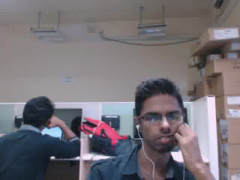

In [ ]:
from torchvision.transforms.functional import to_pil_image

def pil_to_tensor(pil_image):
    # PIL: [width, height]
    # -> NumPy: [height, width, channel]
    # -> Tensor: [channel, height, width]
    return torch.as_tensor(np.asarray(pil_image)).permute(2,0,1)

def tensor_to_pil(tensor_image):
    return to_pil_image(tensor_image)

def tensor_to_pltimg(tensor_image):
    return tensor_image.permute(1,2,0).numpy()

pil_image = PIL.Image.open("/content/drive/MyDrive/DAiSEE Dataset/DAiSEE Dataset/DAiSEE/DataSet/Train/") # (150, 150)
for ttv in ['Test', 'Train', 'Validation']:
    if ttv == '.DS_Store':
        continue
    users = os.listdir('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/')
    for user in users:
        if user == '.DS_Store':
            continue
        currUser = os.listdir('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/'+user+'/')
        for extract in currUser:
            if extract == '.DS_Store':
                continue
            currExtract = os.listdir('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/'+user+'/'+extract+'/')
            for frame in currExtract:
              if extract == '.DS_Store':
                continue
            image = Image.open('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/'+user+'/'+extract+'/'+frame+'')
            image = np.array(image)
            img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
            saturation = img_hsv[:, :, 1].mean()
# Tilt size for check where width/height be
pil_image = torchvision.transforms.Resize((180, 240))(pil_image)

print('PIL:                ', pil_image.size)
print('PIL->Numpy:         ', np.array(pil_image).shape)
print('PIL->tensor:        ', pil_to_tensor(pil_image).shape)
print('PIL->tensor->Numpy: ', np.array(pil_to_tensor(pil_image)).shape)
print('PIL->tensor->PIL:   ', pil_to_tensor(tensor_to_pil(pil_to_tensor(pil_image))).shape)
tensor_to_pil(pil_to_tensor(pil_image))

In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

def make_sample_grid_with_transforms(tf, image_path):
    plt.figure(figsize=(8, 8))
    for i in range(9):
        pil_image = PIL.Image.open(image_path) # shape: (300, 200)
        applied_image = tf(pil_to_tensor(pil_image))
        plt.subplot(3, 3, i+1)
        plt.imshow(tensor_to_pltimg(applied_image))
        plt.axis("off")
    plt.show()

Horizontal Flip

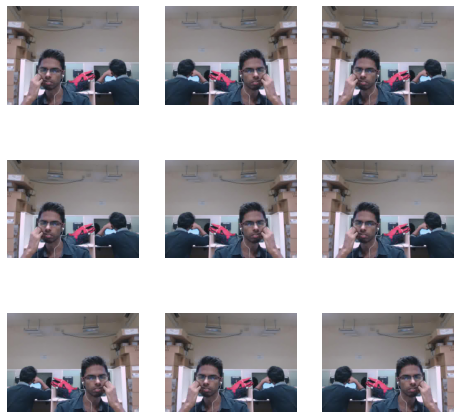

In [ ]:
transform = transforms.RandomHorizontalFlip() 
make_sample_grid_with_transforms(transform, "/content/drive/MyDrive/DAiSEE Dataset/DAiSEE Dataset/DAiSEE/DataSet/Train/110014/1100141050/1100141050113.jpg")

No Rotation

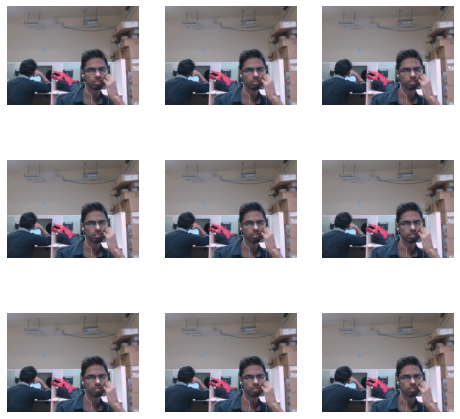

In [ ]:
transform = transforms.RandomRotation(0)
make_sample_grid_with_transforms(transform, "/content/drive/MyDrive/DAiSEE Dataset/DAiSEE Dataset/DAiSEE/DataSet/Train/110014/1100141050/1100141050113.jpg")

Rotation of 20 Degrees

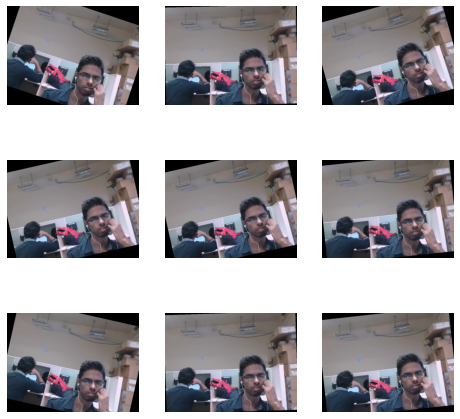

In [ ]:
transform = transforms.RandomRotation(20)
make_sample_grid_with_transforms(transform, "/content/drive/MyDrive/DAiSEE Dataset/DAiSEE Dataset/DAiSEE/DataSet/Train/110014/1100141050/1100141050113.jpg")

Rotation of 45 Degrees

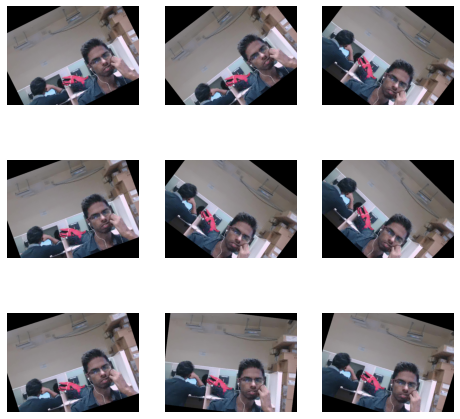

In [ ]:
transform = transforms.RandomRotation(45)
make_sample_grid_with_transforms(transform, "/content/drive/MyDrive/DAiSEE Dataset/DAiSEE Dataset/DAiSEE/DataSet/Train/110014/1100141050/1100141050113.jpg")

Rotation of 90 Degrees

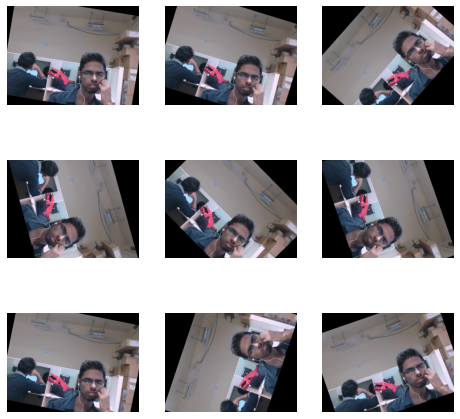

In [ ]:
transform = transforms.RandomRotation(90)
make_sample_grid_with_transforms(transform, "/content/drive/MyDrive/DAiSEE Dataset/DAiSEE Dataset/DAiSEE/DataSet/Train/110014/1100141050/1100141050113.jpg")

Random Affine

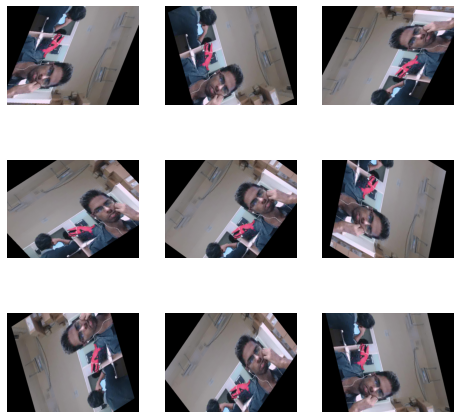

In [ ]:
transform = transforms.RandomAffine(180, shear=20)
make_sample_grid_with_transforms(transform,"/content/drive/MyDrive/DAiSEE Dataset/DAiSEE Dataset/DAiSEE/DataSet/Train/110014/1100141050/1100141050113.jpg")

Conversion to Grayscale

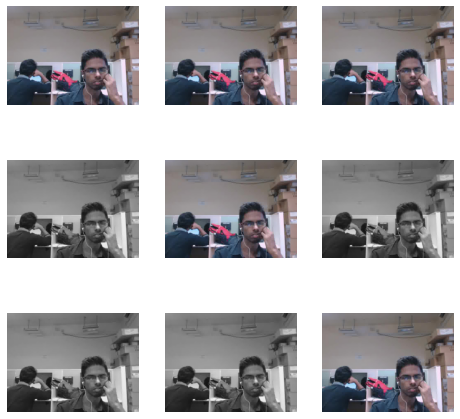

In [ ]:
transform = transforms.RandomGrayscale(p=0.5)
make_sample_grid_with_transforms(transform, "/content/drive/MyDrive/DAiSEE Dataset/DAiSEE Dataset/DAiSEE/DataSet/Train/110014/1100141050/1100141050113.jpg")

In [ ]:
!pip install pillow

In [ ]:
import PIL
import shutil
import os
import torch
import torchvision
import numpy as np

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("/content/drive/MyDrive/DAiSEE Dataset/DAiSEE Dataset/DAiSEE/DataSet/Train/110014/1100141050/1100141050113.jpg")

array([[[156, 144, 144],
        [156, 144, 144],
        [156, 144, 144],
        ...,
        [109, 113, 118],
        [111, 115, 120],
        [113, 117, 122]],

       [[156, 144, 144],
        [156, 144, 144],
        [156, 144, 144],
        ...,
        [109, 113, 118],
        [111, 115, 120],
        [113, 117, 122]],

       [[156, 144, 144],
        [156, 144, 144],
        [156, 144, 144],
        ...,
        [109, 113, 118],
        [111, 115, 120],
        [113, 117, 122]],

       ...,

       [[ 51,  39,  27],
        [ 51,  39,  27],
        [ 51,  39,  27],
        ...,
        [200, 184, 185],
        [200, 184, 185],
        [200, 184, 185]],

       [[ 51,  39,  27],
        [ 51,  39,  27],
        [ 51,  39,  27],
        ...,
        [194, 178, 179],
        [194, 178, 179],
        [194, 178, 179]],

       [[ 51,  39,  27],
        [ 51,  39,  27],
        [ 51,  39,  27],
        ...,
        [190, 174, 175],
        [190, 174, 175],
        [190, 174, 175]]

Dimensionality Reduction using SVD

*** Image Compression using SVD
Sample Original Image: 

Sample Compressed Image: 

original size:
786432
compressed size:
492000
Ratio compressed size / original size:
0.6256103515625
Compressed image size is 62.56% of the original image 
Successfully compressed the image


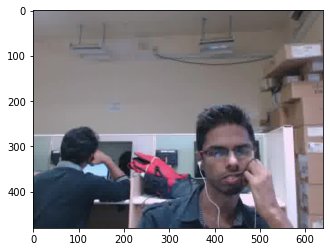

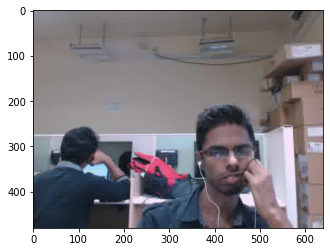

In [ ]:
from IPython.core.pylabtools import print_figure
import numpy
from PIL import Image
import IPython.display

# FUNCTION DEFINTIONS:

# open the image and return 3 matrices, each corresponding to one channel (R, G and B channels)
def openImage(imagePath):
    imOrig = Image.open(imagePath)
    im = numpy.array(imOrig)

    aRed = im[:, :, 0]
    aGreen = im[:, :, 1]
    aBlue = im[:, :, 2]

    return [aRed, aGreen, aBlue, imOrig]


# compress the matrix of a single channel
def compressSingleChannel(channelDataMatrix, singularValuesLimit):
    uChannel, sChannel, vhChannel = numpy.linalg.svd(channelDataMatrix)
    aChannelCompressed = numpy.zeros((channelDataMatrix.shape[0], channelDataMatrix.shape[1]))
    k = singularValuesLimit

    leftSide = numpy.matmul(uChannel[:, 0:k], numpy.diag(sChannel)[0:k, 0:k])
    aChannelCompressedInner = numpy.matmul(leftSide, vhChannel[0:k, :])
    aChannelCompressed = aChannelCompressedInner.astype('uint8')
    return aChannelCompressed


# MAIN PROGRAM:
print('*** Image Compression using SVD')
aRed, aGreen, aBlue, originalImage = openImage('/content/drive/MyDrive/DAiSEE Dataset/DAiSEE Dataset/DAiSEE/DataSet/Train/')
for ttv in ['Test', 'Train', 'Validation']:
    if ttv == '.DS_Store':
        continue
    users = os.listdir('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/')
    for user in users:
        if user == '.DS_Store':
            continue
        currUser = os.listdir('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/'+user+'/')
        for extract in currUser:
            if extract == '.DS_Store':
                continue
            currExtract = os.listdir('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/'+user+'/'+extract+'/')
            for frame in currExtract:
              if extract == '.DS_Store':
                continue
            image = Image.open('/content/drive/MyDrive/DAiSEE/DAiSEE/DataSet/'+ttv+'/'+user+'/'+extract+'/'+frame+'')
            image = np.array(image)
            img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
            saturation = img_hsv[:, :, 1].mean()

# image width and height:
imageWidth = 512
imageHeight = 512

# number of singular values to use for reconstructing the compressed image
singularValuesLimit = 160

aRedCompressed = compressSingleChannel(aRed, singularValuesLimit)
aGreenCompressed = compressSingleChannel(aGreen, singularValuesLimit)
aBlueCompressed = compressSingleChannel(aBlue, singularValuesLimit)

imr = Image.fromarray(aRedCompressed, mode=None)
img = Image.fromarray(aGreenCompressed, mode=None)
imb = Image.fromarray(aBlueCompressed, mode=None)

newImage = Image.merge("RGB", (imr, img, imb))
print("Sample Original Image: \n")
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure()
plt.imshow(originalImage)
print("Sample Compressed Image: \n")
plt.figure()
plt.imshow(newImage)

# CALCULATE AND DISPLAY THE COMPRESSION RATIO
mr = imageHeight
mc = imageWidth

originalSize = mr * mc * 3
compressedSize = singularValuesLimit * (1 + mr + mc) * 3

print('original size:')
print(originalSize)

print('compressed size:')
print(compressedSize)

print('Ratio compressed size / original size:')
ratio = compressedSize * 1.0 / originalSize
print(ratio)

print('Compressed image size is ' + str(round(ratio * 100, 2)) + '% of the original image ')
print('Successfully compressed the image')

# New Section